# K Nearest Neighbors Project

__Data set__: classified data where features are unknown.

__Goal__: use KNN to create a model that directly predicts a class for a new data point based off of the features

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [14]:
# Load the data into a datafram

df = pd.read_csv('KNN_Project_Data')

## Exploratory Data Analysis

In [15]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


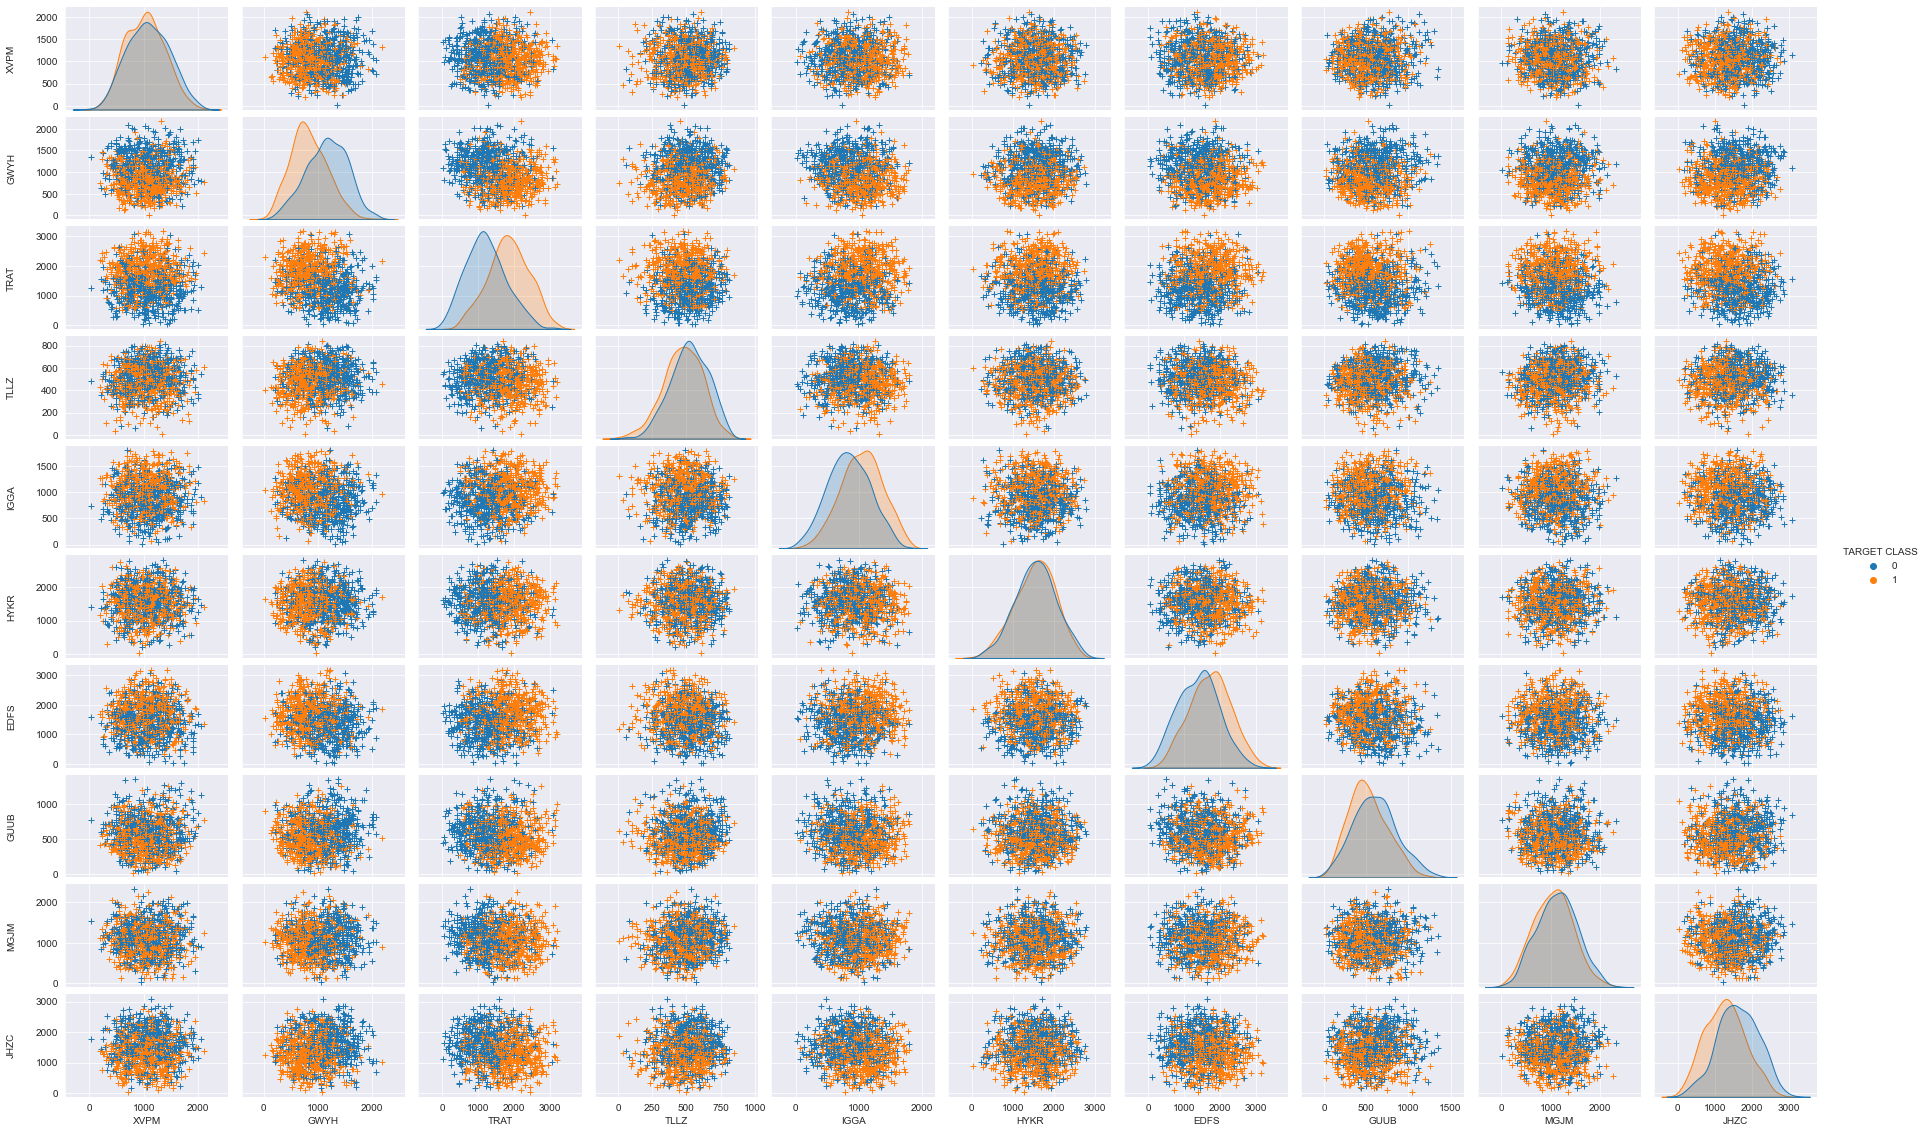

In [17]:
# Pairplot to check for correlations between features with category 'TARGET CLASS'

sns.set_style("darkgrid")

g = sns.pairplot(df, hue='TARGET CLASS', height=1.6, aspect=1.6, plot_kws=dict(marker="+", linewidth=1))
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.3,0.5);

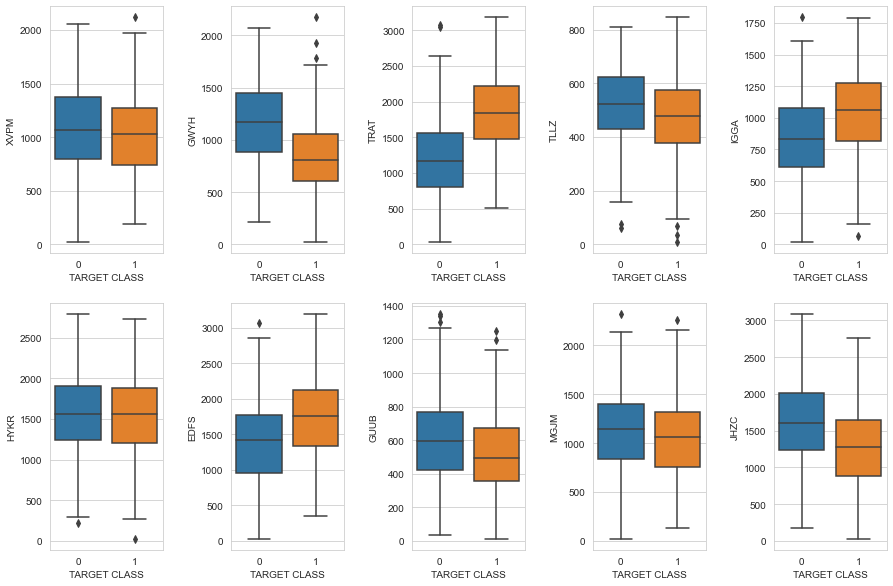

In [82]:
# Boxplots of the unknow features before variable standardization

sns.set_style("whitegrid")
features = df.columns[:-1]

fig, axes = plt.subplots(2, 5)
fig.subplots_adjust(wspace=0.6, hspace=0.2)
fig.align_ylabels()
fig.set_size_inches(15,10)

axes = axes.flatten()
for i in range(10):
    sns.boxplot(x="TARGET CLASS", y=features[i], data=df, ax=axes[i])

## Standardizing the Variables

In [19]:
from sklearn.preprocessing import StandardScaler

# From the docs: 
# "Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; 
# they might behave badly if the individual features do not more or less look like standard normally distributed data: 
# Gaussian with zero mean and unit variance.""
# Source: https://scikit-learn.org/stable/modules/preprocessing.html


In [11]:
scaler = StandardScaler()

# From the docs:
# "Standardize features by removing the mean and scaling to unit variance."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [20]:
# Before fitting we drop the TARGET CLASS column

scaler.fit(df.drop('TARGET CLASS',axis=1))

# From the docs: "Compute the mean and std to be used for later scaling."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

StandardScaler()

In [21]:
# Transforms the features to a scaled version
# From the docs: "Perform standardization by centering and scaling."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [22]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [28]:
df.drop('TARGET CLASS',axis=1).describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000


In [27]:
df_feat.describe()

# Notice the mean has been removed (->> 0) and that the variance has been scaled to unity (std = sqrt(1))

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.421085e-17,1.891820e-16,2.486900e-17,1.332268e-16,-1.563194e-16,-2.788880e-16,-1.723066e-16,-7.283063e-17,-4.831691e-16,9.769963e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.788339e+00,-2.474303e+00,-2.340083e+00,-3.409927e+00,-2.668575e+00,-3.087121e+00,-2.555607e+00,-2.215822e+00,-2.648319e+00,-2.503543e+00
25%,-7.757873e-01,-7.574735e-01,-7.293713e-01,-6.538711e-01,-6.936419e-01,-6.718168e-01,-7.168625e-01,-7.266069e-01,-7.136450e-01,-6.921254e-01
50%,-2.472083e-02,-3.442255e-02,-1.072910e-02,3.566665e-02,-3.590482e-03,2.911148e-02,8.155695e-03,-8.463946e-02,2.489807e-02,-1.931429e-02
75%,7.308466e-01,7.235137e-01,7.215308e-01,7.386505e-01,6.998930e-01,6.919471e-01,7.032086e-01,6.650219e-01,6.978394e-01,7.253420e-01
max,2.863927e+00,3.009948e+00,2.579241e+00,2.451642e+00,2.465393e+00,2.518753e+00,2.732696e+00,3.198000e+00,3.060964e+00,2.881896e+00


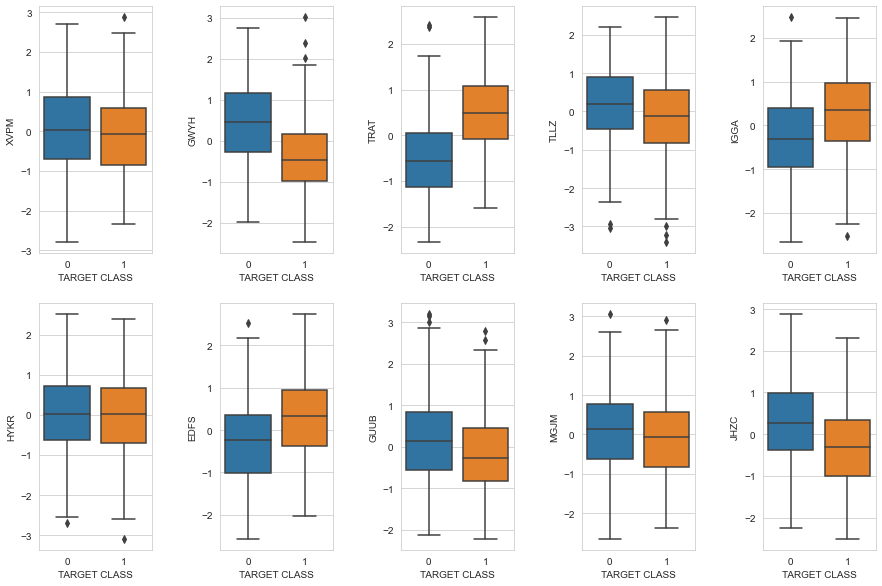

In [83]:
# Boxplots of the unknow features after variable standardization

sns.set_style("whitegrid")
features = df_feat.columns
df_feat["TARGET CLASS"] = df["TARGET CLASS"]

fig, axes = plt.subplots(2, 5)
fig.subplots_adjust(wspace=0.6, hspace=0.2)
fig.align_ylabels()
fig.set_size_inches(15,10)

axes = axes.flatten()
for i in range(10):
    sns.boxplot(x="TARGET CLASS", y=features[i], data=df_feat, ax=axes[i])

## KNN Modelling

In [43]:
from sklearn.model_selection import train_test_split

In [86]:
# Split train test

X = scaled_features
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
# KNN model instance

knn = KNeighborsClassifier(n_neighbors=1)

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [88]:
# From docs: "Fit the k-nearest neighbors classifier from the training dataset."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [89]:
# From docs: "Predict the class labels for the provided data."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

pred = knn.predict(X_test)

## Predictions and Evaluation

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [91]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [109]:
# We need to determine the error rate for various values of K to find an optimal value.
# Use the "elbow" method.

error_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# The pred_i != y_test is the indicator variable which equals 1 if it is True, and 0 otherwise. 
# Basically we are calculating the number of misclassifications to the total number of observations. 
# This gives us the test error for a given K value.

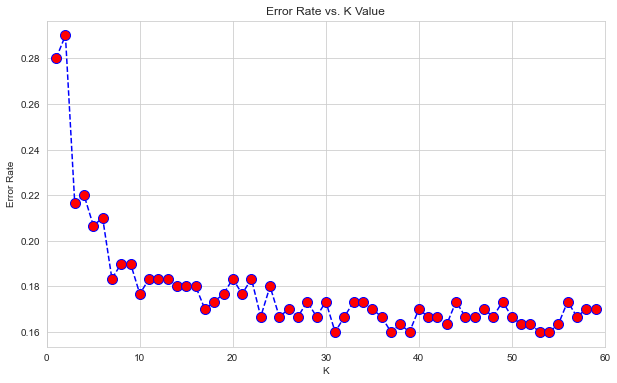

In [110]:
# Visualization of the errors versus K values

plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xlim(0,60);

In [107]:
# Now we will retrain the model with an optimal value of K.
# In this case we will use 31. For K > 30, the eror is more or less saturated.

knn_retrain = KNeighborsClassifier(n_neighbors=31)
knn_retrain.fit(X_train,y_train)
pred_retrain = knn_retrain.predict(X_test)
print('WITH K=31')
print('\n')
print(confusion_matrix(y_test,pred_retrain))
print('\n')
print(classification_report(y_test,pred_retrain))

WITH K=31


[[123  29]
 [ 19 129]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [108]:
# For comparison to the model with K = 1

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[109  43]
 [ 41 107]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



__Conclusion__: We see that the KNN model with K = 31 gives good overall results with less type I/II errors and better scores compared to K = 1. 